<a href="https://colab.research.google.com/github/Muhammadatir/colab_notebook_iiit-hub/blob/main/STP_Module4Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

# Gradient Descent: A Quick Recap

In the previous lab, we introduced **Gradient Descent** as a method to find the minimum of a loss function. It is the core optimization algorithm that powers a vast majority of **Machine Learning** and **Deep Learning** models.

---

### A Quick Recap of the Algorithm

The core idea of **Gradient Descent** is to iteratively take steps in the direction of the steepest descent of a function (our loss function) to find its minimum.

1. Start with a random initialization of the solution (model parameters or weights).
2. Incrementally change the solution by moving in the direction of the **negative gradient** of the loss function.
3. Repeat the previous step until some convergence criteria is met.

---

The key update equation for a weight or parameter ($w$) is:

$$
w_{k+1} \leftarrow w_k - \eta \nabla J
$$

Where:
- $w_k$ is the current weight.
- $\eta$ is the **learning rate**.
- $\nabla J$ is the **gradient of the loss function** $J$.


In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


### Setting up the Environment and Data

First, let's import the necessary libraries and set a random seed for reproducibility.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

## Creating the Data

We'll generate some synthetic data that follows a **linear pattern**. Our true linear equation will be:

$$
y = 4 + 3x
$$

We will also add some **random noise** to the y values to simulate real-world data, which is rarely perfect.

Let's generate the data with:
- `y0 = 4` (intercept)
- `y1 = 3` (slope)

and add some noise to the data.


In [ ]:
# We are creating data based on the equation y = 4 + 3x + noise

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Here, np.random.rand(100, 1) creates 100 random numbers between 0 and 1. Multiplying by 2 scales this to be between 0 and 2. np.random.randn(100, 1) adds Gaussian noise (random fluctuations) to our y values.

Let's also plot the data we just created

Text(0, 0.5, 'y')

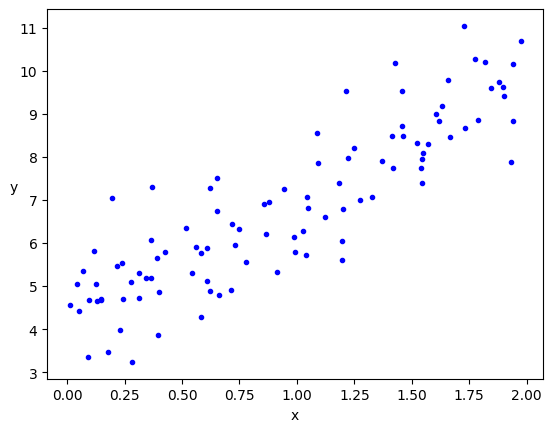

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

Our goal is to use Gradient Descent to find the original parameters (intercept = 4, slope = 3) just by looking at this scattered data.

## The Cost Function for Linear Regression

Before we can optimize, we need to define how we measure error. For **Linear Regression**, we use the **Mean Squared Error (MSE)** cost function. It measures the average squared difference between the model's predictions and the actual values.

The equation for the MSE cost function $J$ is:

$$
J(\theta) = \frac{1}{2m}  \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples.
- $\theta$ is our vector of model parameters (in our case, the intercept and the slope).
- $h_\theta(x^{(i)})$ is the prediction for the $i$-th example.
- $y^{(i)}$ is the true label for the $i$-th example.

The $\frac{1}{2}$ is included for convenience, as it simplifies the derivative calculation.


In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## The Gradient of the Cost Function

To use **Gradient Descent**, we need the partial derivatives of the cost function with respect to each parameter \(\theta_j\).

The general form of the gradient for **Linear Regression** is:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

For our problem with one feature \(x\) and an intercept, we have two parameters: \(\theta_0\) (intercept) and \(\theta_1\) (slope). The updates will be:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_1^{(i)}
$$

This can be written in a compact, **vectorized form**:

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$


### Variant 1: Batch Gradient Descent

**Batch Gradient Descent** is the simplest variant. In each step, it calculates the gradient using the **entire training dataset**.

**Pros:**
- The convergence path is smooth and stable because the gradient is a true average over all data.

**Cons:**
- It is very slow and computationally expensive for large datasets.


In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of parameters (theta)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        # Calculate prediction: prediction = X . theta
        prediction = np.dot(X, y_pred)

        # Update parameters: theta = theta - (1/m) * learning_rate * (X^T . (prediction - y))
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))

        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

### Running Batch Gradient Descent

Let's run this for **1000 iterations** with a learning rate of **0.01**. We start with a random guess for our parameters (`y_pred`).

**Our model** is:
$$
y = \theta_0 + \theta_1 x
$$

**A crucial step:**
To handle the intercept term $\theta_0$ using matrix multiplication, we add a "dummy" feature $x_0 = 1$ to all our input samples. This is known as the **bias trick**.


In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


The learned parameters (3.903, 3.046) are very close to our original true values (4, 3)!

### Visualizing the Loss

Let's plot the error at each iteration. This is our "descent down the mountain".

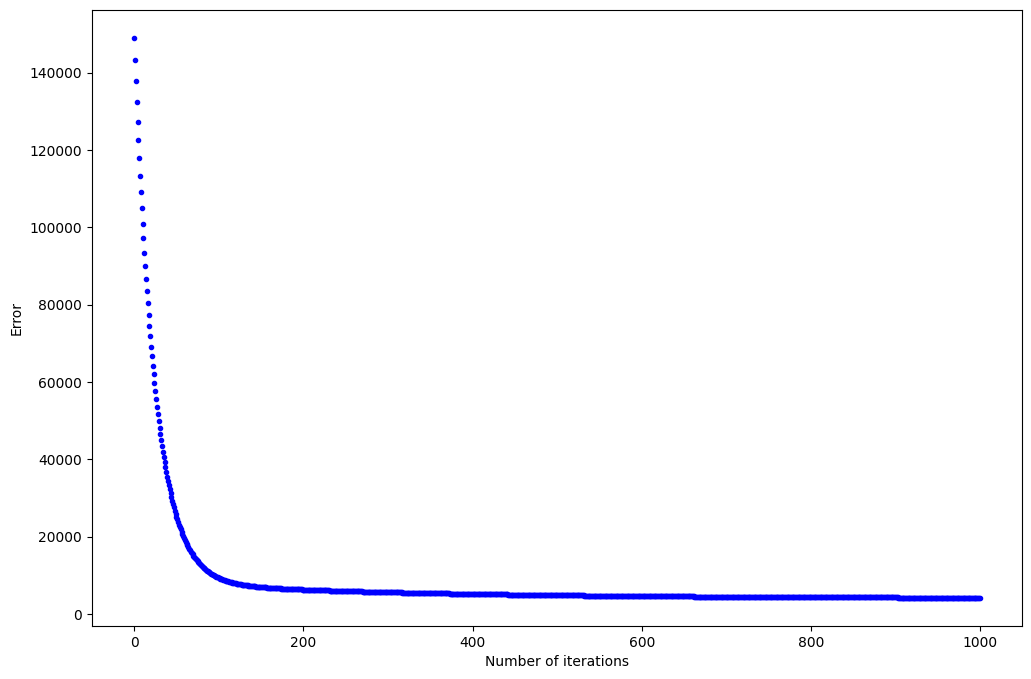

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in on the first 200 iterations shows how the error drops rapidly at first and then slows down as it approaches the minimum.

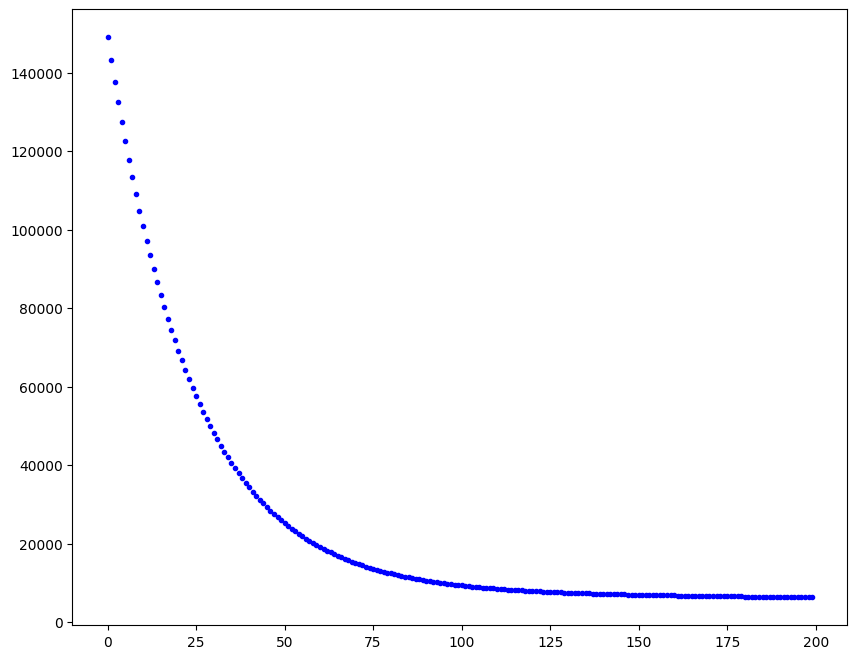

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

The smooth curve is characteristic of Batch Gradient Descent.

### Variant 2: Stochastic Gradient Descent (SGD)

**Batch GD** is inefficient for large datasets. **SGD** addresses this by taking a gradient step based on **only one randomly chosen training example at a time**.

**Pros:**
- Extremely fast per step.
- Can help escape shallow local minima due to its random nature.

**Cons:**
- The path to the minimum is very noisy and erratic.
- It never truly "settles" at the minimum but bounces around it.


In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run SGD. Note that it requires a much higher learning rate and fewer epochs (passes over the data) to converge.

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


Again, the parameters are close to the true values, but notice the final error is higher and the parameters are slightly less accurate. This is due to the noisy nature of SGD.


### Visualizing the Loss

The loss curve for SGD is much more erratic.

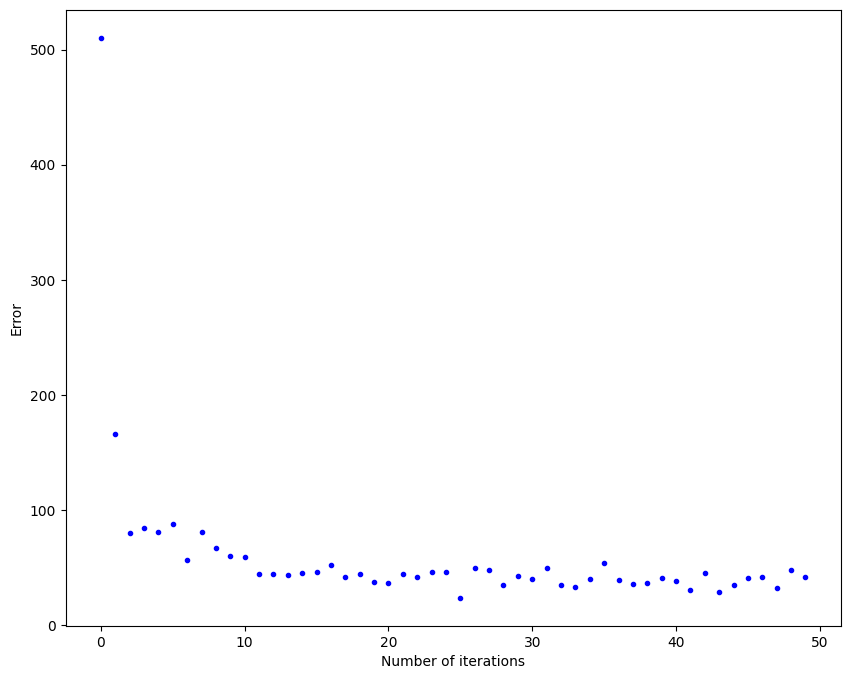

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Variant 3: Mini-Batch Gradient Descent

**Mini-Batch GD** is the happy medium. It computes the gradient on a small, random subset of the data called a **mini-batch**.

**Pros:**
- A good balance between the stability of Batch GD and the speed of SGD.
- Allows for vectorized implementation, making it very efficient on modern hardware (like GPUs).

**Cons:**
- Introduces a new hyperparameter: the `batch_size`.

This is the **most common variant** used in deep learning today.


In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run it.

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


### Visualizing the Loss

The loss curve is less noisy than SGD but not as smooth as Batch GD.

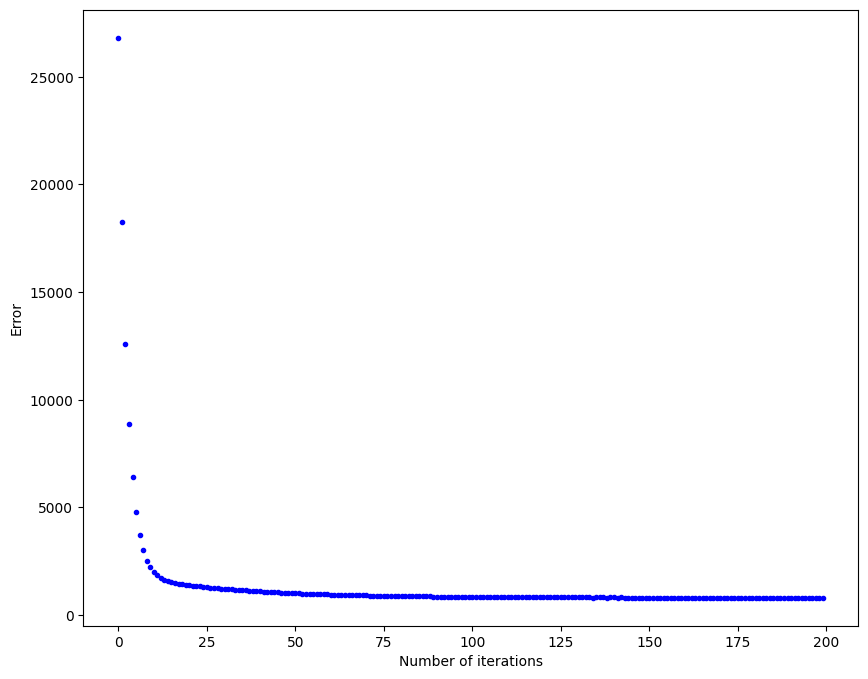

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Visual Comparison of the Learned Models

Let's re-run all three algorithms and plot their final learned lines on the original data. This will give us a better intuition for how they perform.

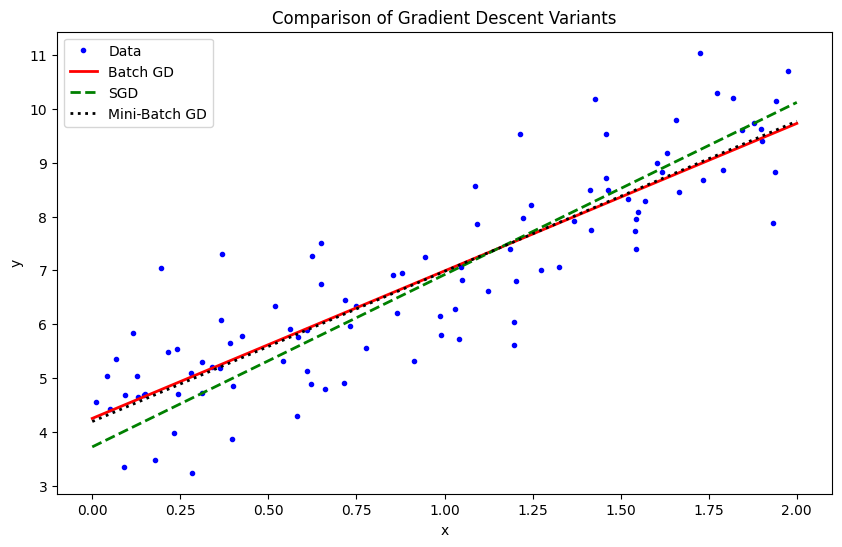

In [ ]:
# Rerun all three for comparison
# Batch
lr_batch = 0.1
n_iter_batch = 200
y_pred_batch_final, _, _ = gradient_descent(X_b, y, np.random.randn(2,1), lr_batch, n_iter_batch)

# SGD
lr_sgd = 0.05
n_iter_sgd = 200
y_pred_sgd_final, _ = stocashtic_gradient_descent(X_b, y, np.random.randn(2,1), lr_sgd, n_iter_sgd)

# Mini-Batch
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
# Create a set of X values for plotting the lines
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# Get predictions for the lines
y_predict_batch = X_new_b.dot(y_pred_batch_final)
y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini = X_new_b.dot(y_pred_mini_final)

plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')
plt.plot(X_new, y_predict_mini, 'k:', linewidth=2, label='Mini-Batch GD')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()

As you can see, all three methods find a very good fit to the data. While their training dynamics (the loss curves) are very different, they all achieve the same goal.

### Things to Try Out

1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

2. **Test on real datasets:**
   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.

3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?

4. **Implement a learning rate schedule for SGD:**
   Instead of a fixed learning rate, make it decrease over time (e.g., `lr = initial_lr / (epoch + 1)`). How does this affect the final error and the stability of the loss curve?


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

### Answer



The correct statement is (iii).

**Explanation:**

* A convex loss function has a single minimum, which is the global minimum (like a perfect bowl).

* Batch Gradient Descent calculates the true gradient of the entire dataset. With a suitable learning rate, it will take determined, non-random steps directly towards the minimum. It is therefore guaranteed to converge to the global optimum of a convex function.

* Stochastic Gradient Descent uses a single random point to estimate the gradient. This estimate is noisy and does not point directly at the minimum. Because of this randomness, SGD will not converge to the exact minimum point but will instead perpetually bounce around in the vicinity of the minimum. To make it converge, one typically has to use a learning rate schedule that slowly decreases the learning rate to zero.

* Statements (i) and (ii) are too strong; they don't specify the type of loss function. For a non-convex function (with many local minima), neither is guaranteed to find the global optimum. They might get stuck in a local minimum.

* **Therefore**, for a convex problem, Batch GD is guaranteed to find the optimum, while standard SGD is not guaranteed to land precisely on it.

# Task
To investigate the effect of mini-batch size on the loss curve and convergence behavior, run Mini-Batch Gradient Descent with batch sizes 2, 80, and the full dataset size (100). Plot the cost histories for these three batch sizes on the same graph.

## Investigate Mini-Batch Size

### Subtask:
Run Mini-Batch Gradient Descent with different batch sizes (2, 80, and the full dataset size) to observe how the loss curve and convergence behavior change. Plot the cost histories for comparison.


**Reasoning**:
The subtask requires running Mini-Batch Gradient Descent with different batch sizes (2, 80, and the full dataset size of 100) and storing their cost histories. I will start by defining the common parameters (`lr`, `n_iter`) and then execute the `minibatch_gradient_descent` function for `batch_size=2`.



In [20]:
lr = 0.1
n_iter = 200

batch_size_2 = 2
batch_size_80 = 80
batch_size_full = len(X) # which is 100

# Run with batch_size = 2
y_pred_mb2 = np.random.randn(2,1)
_, cost_history_mb2 = minibatch_gradient_descent(X, y, y_pred_mb2, lr, n_iter, batch_size=batch_size_2)

# Run with batch_size = 80
y_pred_mb80 = np.random.randn(2,1)
_, cost_history_mb80 = minibatch_gradient_descent(X, y, y_pred_mb80, lr, n_iter, batch_size=batch_size_80)

# Run with full batch_size (100)
y_pred_mb_full = np.random.randn(2,1)
_, cost_history_mb_full = minibatch_gradient_descent(X, y, y_pred_mb_full, lr, n_iter, batch_size=batch_size_full)

print("Mini-Batch GD with batch_size=2 executed. Final error: {:0.3f}".format(cost_history_mb2[-1]))
print("Mini-Batch GD with batch_size=80 executed. Final error: {:0.3f}".format(cost_history_mb80[-1]))
print("Mini-Batch GD with full batch_size executed. Final error: {:0.3f}".format(cost_history_mb_full[-1]))

Mini-Batch GD with batch_size=2 executed. Final error: 121.462
Mini-Batch GD with batch_size=80 executed. Final error: 3669.057
Mini-Batch GD with full batch_size executed. Final error: 6067.761


**Reasoning**:
The previous step successfully ran the Mini-Batch Gradient Descent for different batch sizes and stored their cost histories. Now, I need to visualize these cost histories on a single plot to compare their convergence behaviors as per the instructions.



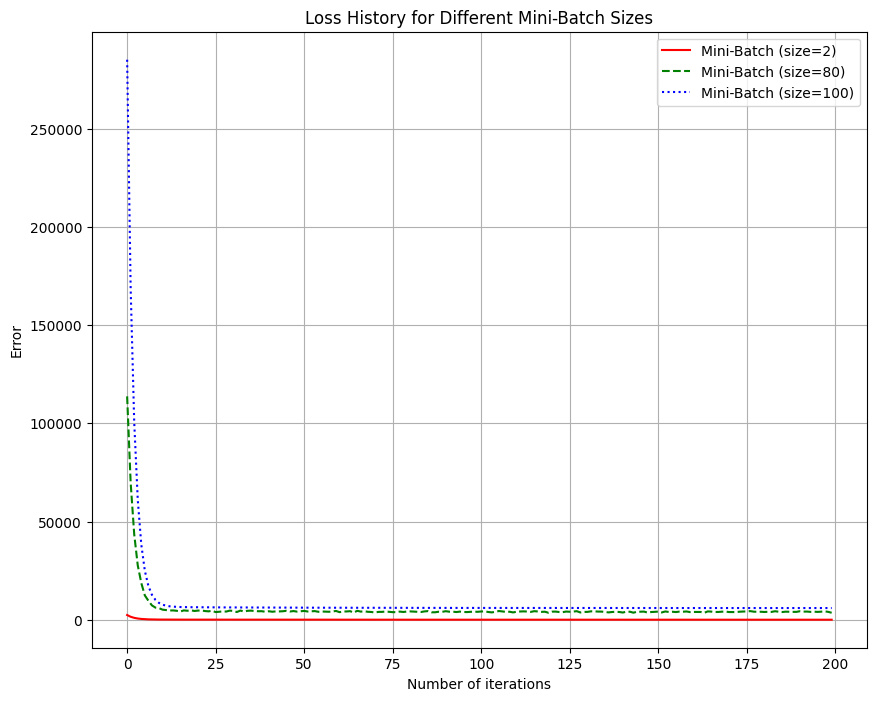

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(range(n_iter), cost_history_mb2, 'r-', label=f'Mini-Batch (size={batch_size_2})')
plt.plot(range(n_iter), cost_history_mb80, 'g--', label=f'Mini-Batch (size={batch_size_80})')
plt.plot(range(n_iter), cost_history_mb_full, 'b:', label=f'Mini-Batch (size={batch_size_full})')

plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Loss History for Different Mini-Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()

## Test on Diabetes Dataset

### Subtask:
Load the Diabetes dataset, preprocess it, and apply Batch, Stochastic, and Mini-Batch Gradient Descent variants. Plot and compare their respective loss curves.


**Reasoning**:
The subtask requires loading, preprocessing the Diabetes dataset, and then applying Batch, Stochastic, and Mini-Batch Gradient Descent. This step covers importing necessary libraries, loading the dataset, scaling features, reshaping the target, adding bias, defining parameters, and running all three gradient descent variants to store their cost histories as per instructions 1-9.



In [22]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# 2. Load the diabetes dataset and extract features and target
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# 3. Initialize a StandardScaler and fit/transform the features
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# 4. Reshape the target variable y into a 2D column vector
y_diabetes_reshaped = y_diabetes.reshape(-1, 1)

# 5. Create X_b_diabetes by adding a column of ones (for Batch and SGD)
X_diabetes_b = np.c_[np.ones((len(X_diabetes_scaled), 1)), X_diabetes_scaled]

# 6. Define common learning rates and number of iterations
lr_diabetes_batch = 0.01
n_iter_diabetes_batch = 1000

lr_diabetes_sgd = 0.05
n_iter_diabetes_sgd = 200

lr_diabetes_minibatch = 0.05
n_iter_diabetes_minibatch = 200
batch_size_diabetes = 32 # A common mini-batch size

# Get number of features for initial y_pred (including bias term if X_b is used)
n_features_diabetes = X_diabetes_b.shape[1]

# 7. For Batch Gradient Descent
y_pred_batch_diabetes = np.random.randn(n_features_diabetes, 1)
_, cost_history_batch_diabetes, _ = gradient_descent(X_diabetes_b, y_diabetes_reshaped, y_pred_batch_diabetes, lr_diabetes_batch, n_iter_diabetes_batch)

# 8. For Stochastic Gradient Descent
y_pred_sgd_diabetes = np.random.randn(n_features_diabetes, 1)
_, cost_history_sgd_diabetes = stocashtic_gradient_descent(X_diabetes_b, y_diabetes_reshaped, y_pred_sgd_diabetes, lr_diabetes_sgd, n_iter_diabetes_sgd)

# 9. For Mini-Batch Gradient Descent (Note: minibatch_gradient_descent function expects X without bias, adds it internally)
y_pred_minibatch_diabetes = np.random.randn(n_features_diabetes, 1)
_, cost_history_minibatch_diabetes = minibatch_gradient_descent(X_diabetes_scaled, y_diabetes_reshaped, y_pred_minibatch_diabetes, lr_diabetes_minibatch, n_iter_diabetes_minibatch, batch_size=batch_size_diabetes)

print(f"Batch GD Final Error: {cost_history_batch_diabetes[-1]:.3f}")
print(f"SGD Final Error: {cost_history_sgd_diabetes[-1]:.3f}")
print(f"Mini-Batch GD Final Error: {cost_history_minibatch_diabetes[-1]:.3f}")

Batch GD Final Error: 281213000.965
SGD Final Error: 635461.428
Mini-Batch GD Final Error: 20109078.824


**Reasoning**:
The previous step successfully ran all three gradient descent variants on the Diabetes dataset and stored their cost histories. The next instruction (instruction 10) is to plot these cost histories on a single graph for comparison, with appropriate labels, title, and legend.



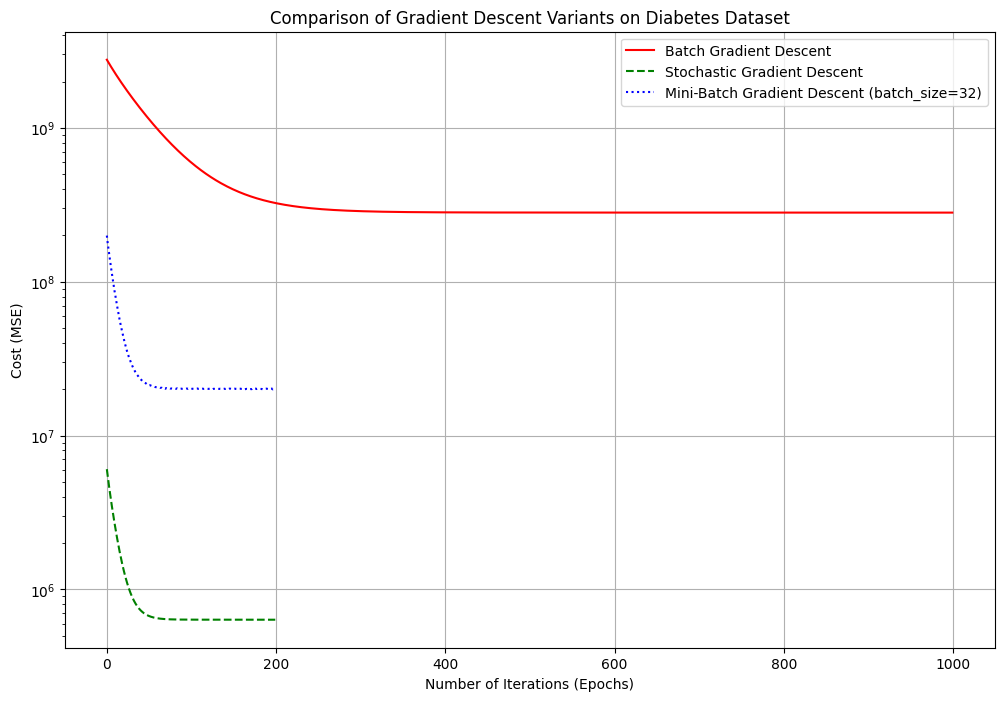

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(range(n_iter_diabetes_batch), cost_history_batch_diabetes, 'r-', label='Batch Gradient Descent')
plt.plot(range(n_iter_diabetes_sgd), cost_history_sgd_diabetes, 'g--', label='Stochastic Gradient Descent')
plt.plot(range(n_iter_diabetes_minibatch), cost_history_minibatch_diabetes, 'b:', label=f'Mini-Batch Gradient Descent (batch_size={batch_size_diabetes})')

plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Cost (MSE)')
plt.title('Comparison of Gradient Descent Variants on Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.yscale('log') # Use log scale for better visualization if errors vary widely
plt.show()

## Compare Learning Rates

### Subtask:
For each of the three Gradient Descent variants (Batch, SGD, Mini-Batch), run them with a very high and a very low learning rate. Plot the cost histories for each scenario to compare their sensitivity to the learning rate.


**Reasoning**:
I will define high and low learning rates for each Gradient Descent variant, initialize parameters, run the respective algorithms with these learning rates, and store the cost histories as instructed. Finally, I will print the last error value for each run to observe their outcomes.



In [25]:
n_iter_general = 200 # Common iterations for all comparisons
X_b = np.c_[np.ones((len(X), 1)), X] # Re-define X_b from X
n_features = X_b.shape[1]

# 1-4. Batch Gradient Descent with high and low learning rates
lr_batch_high = 0.5
lr_batch_low = 0.0001

initial_y_pred_batch_high = np.random.randn(n_features,1)
_, cost_history_batch_high, _ = gradient_descent(X_b, y, initial_y_pred_batch_high, lr_batch_high, n_iter_general)

initial_y_pred_batch_low = np.random.randn(n_features,1)
_, cost_history_batch_low, _ = gradient_descent(X_b, y, initial_y_pred_batch_low, lr_batch_low, n_iter_general)


# 5-8. Stochastic Gradient Descent with high and low learning rates
lr_sgd_high = 0.5
lr_sgd_low = 0.0001

initial_y_pred_sgd_high = np.random.randn(n_features,1)
_, cost_history_sgd_high = stocashtic_gradient_descent(X_b, y, initial_y_pred_sgd_high, lr_sgd_high, n_iter_general)

initial_y_pred_sgd_low = np.random.randn(n_features,1)
_, cost_history_sgd_low = stocashtic_gradient_descent(X_b, y, initial_y_pred_sgd_low, lr_sgd_low, n_iter_general)


# 9-12. Mini-Batch Gradient Descent with high and low learning rates
lr_mb_high = 0.5
lr_mb_low = 0.0001
mb_batch_size = 32 # Using a fixed batch size for mini-batch comparison

initial_y_pred_mb_high = np.random.randn(n_features,1)
# Note: minibatch_gradient_descent expects X without bias, adds it internally
_, cost_history_mb_high = minibatch_gradient_descent(X, y, initial_y_pred_mb_high, lr_mb_high, n_iter_general, batch_size=mb_batch_size)

initial_y_pred_mb_low = np.random.randn(n_features,1)
# Note: minibatch_gradient_descent expects X without bias, adds it internally
_, cost_history_mb_low = minibatch_gradient_descent(X, y, initial_y_pred_mb_low, lr_mb_low, n_iter_general, batch_size=mb_batch_size)

# 13. Print final errors
print(f"Batch GD (High LR) Final Error: {cost_history_batch_high[-1]:.3f}")
print(f"Batch GD (Low LR) Final Error: {cost_history_batch_low[-1]:.3f}")
print(f"SGD (High LR) Final Error: {cost_history_sgd_high[-1]:.3f}")
print(f"SGD (Low LR) Final Error: {cost_history_sgd_low[-1]:.3f}")
print(f"Mini-Batch GD (High LR) Final Error: {cost_history_mb_high[-1]:.3f}")
print(f"Mini-Batch GD (Low LR) Final Error: {cost_history_mb_low[-1]:.3f}")

Batch GD (High LR) Final Error: 6063.029
Batch GD (Low LR) Final Error: 307547.844
SGD (High LR) Final Error: 59.876
SGD (Low LR) Final Error: 3781.717
Mini-Batch GD (High LR) Final Error: 1865.837
Mini-Batch GD (Low LR) Final Error: 112756.613


**Reasoning**:
The previous step successfully ran the gradient descent variants with different learning rates and stored their cost histories. Now, I need to visualize these cost histories by creating three separate plots, one for each variant (Batch, SGD, and Mini-Batch Gradient Descent), to compare the effect of high and low learning rates as per the subtask instructions.



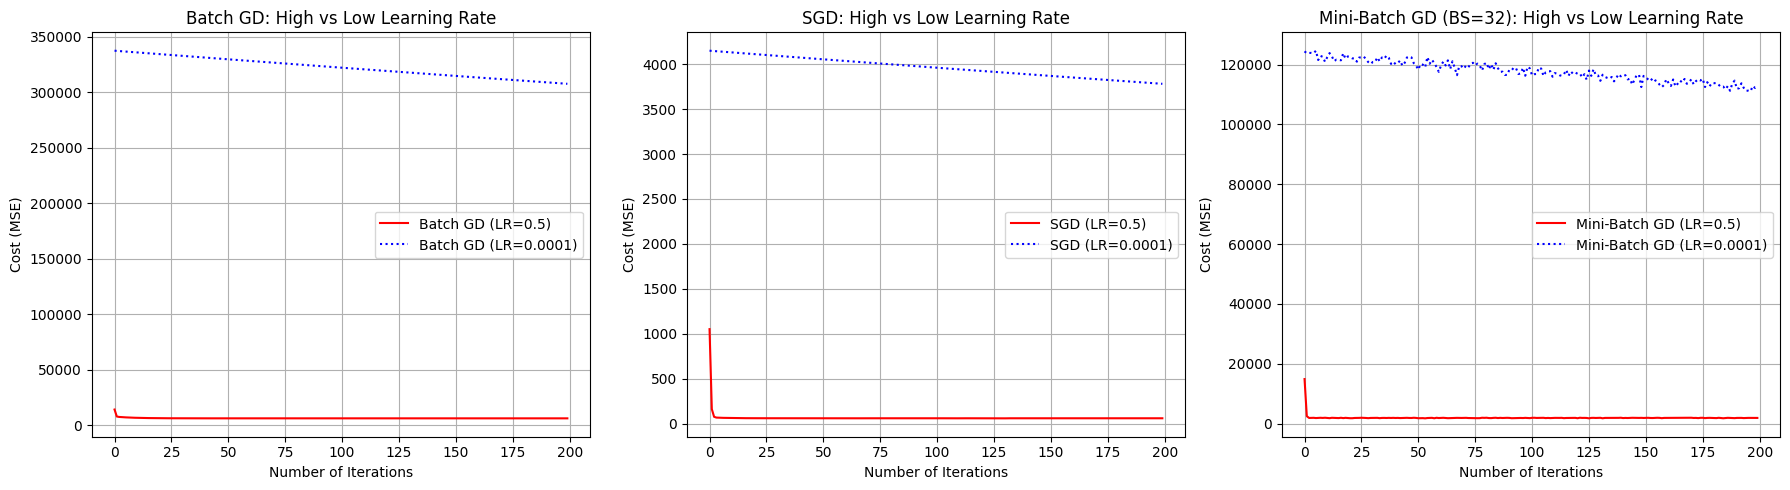

In [26]:
plt.figure(figsize=(18, 5))

# Plot 1: Batch Gradient Descent
plt.subplot(1, 3, 1)
plt.plot(range(n_iter_general), cost_history_batch_high, 'r-', label=f'Batch GD (LR={lr_batch_high})')
plt.plot(range(n_iter_general), cost_history_batch_low, 'b:', label=f'Batch GD (LR={lr_batch_low})')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Batch GD: High vs Low Learning Rate')
plt.legend()
plt.grid(True)

# Plot 2: Stochastic Gradient Descent
plt.subplot(1, 3, 2)
plt.plot(range(n_iter_general), cost_history_sgd_high, 'r-', label=f'SGD (LR={lr_sgd_high})')
plt.plot(range(n_iter_general), cost_history_sgd_low, 'b:', label=f'SGD (LR={lr_sgd_low})')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('SGD: High vs Low Learning Rate')
plt.legend()
plt.grid(True)

# Plot 3: Mini-Batch Gradient Descent
plt.subplot(1, 3, 3)
plt.plot(range(n_iter_general), cost_history_mb_high, 'r-', label=f'Mini-Batch GD (LR={lr_mb_high})')
plt.plot(range(n_iter_general), cost_history_mb_low, 'b:', label=f'Mini-Batch GD (LR={lr_mb_low})')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title(f'Mini-Batch GD (BS={mb_batch_size}): High vs Low Learning Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Implement Learning Rate Schedule for SGD

### Subtask:
Modify the Stochastic Gradient Descent function to include a learning rate schedule (e.g., `lr = initial_lr / (epoch + 1)`). Run this new variant and plot its cost history, comparing it to the standard SGD to evaluate its effect on stability and final error.


**Reasoning**:
The first instruction is to define a new function `stocashtic_gradient_descent_scheduled` that implements a learning rate schedule. This function will be a modification of the existing `stocashtic_gradient_descent` function, incorporating the `lr = initial_lr / (epoch + 1)` schedule.



In [27]:
def stocashtic_gradient_descent_scheduled(X, y, y_pred, initial_learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    initial_learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        # Apply learning rate schedule: lr = initial_lr / (epoch + 1)
        learning_rate = initial_learning_rate / (it + 1)
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

print("Defined stocashtic_gradient_descent_scheduled function.")

Defined stocashtic_gradient_descent_scheduled function.


**Reasoning**:
The next step is to define parameters for the scheduled SGD, initialize `y_pred`, run the `stocashtic_gradient_descent_scheduled` function, store its cost history, and print the final error, as per instructions 2-6.



In [28]:
initial_lr_sgd_schedule = 0.5
n_iter_sgd_schedule = 200

y_pred_sgd_scheduled = np.random.randn(X_b.shape[1], 1)

_, cost_history_sgd_scheduled = stocashtic_gradient_descent_scheduled(X_b, y, y_pred_sgd_scheduled, initial_lr_sgd_schedule, n_iter_sgd_schedule)

print(f"Scheduled SGD Final Error: {cost_history_sgd_scheduled[-1]:.3f}")

Scheduled SGD Final Error: 71.049


**Reasoning**:
The previous steps successfully ran the scheduled SGD and stored its cost history. The next instruction (instruction 7 and 8) is to plot the cost history of the scheduled SGD and compare it with the cost history of a standard SGD run, using appropriate labels, titles, and a legend.



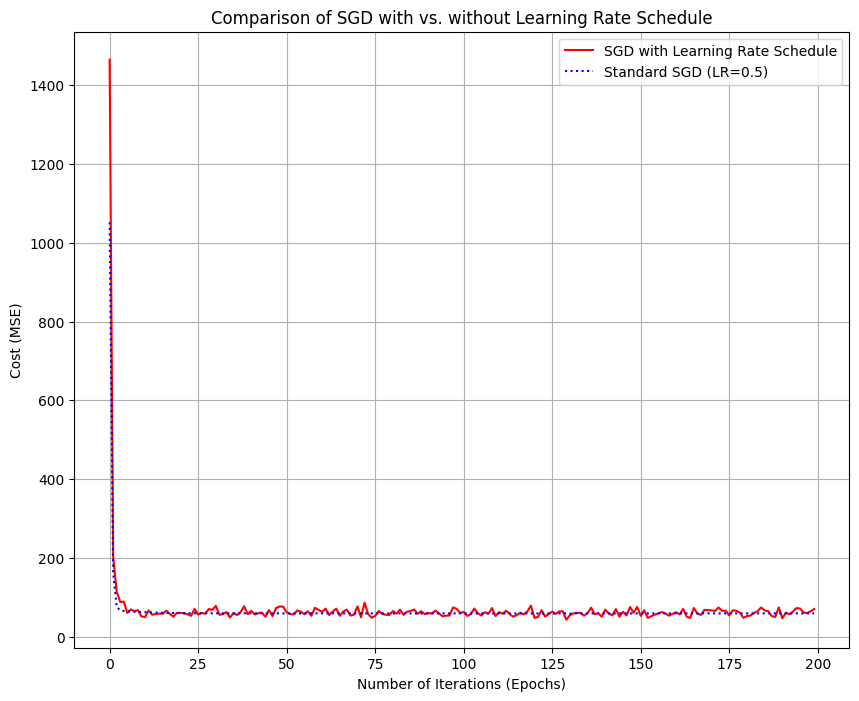

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(range(n_iter_sgd_schedule), cost_history_sgd_scheduled, 'r-', label='SGD with Learning Rate Schedule')
plt.plot(range(n_iter_general), cost_history_sgd_high, 'b:', label=f'Standard SGD (LR={lr_sgd_high})') # Using high LR SGD for comparison

plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Cost (MSE)')
plt.title('Comparison of SGD with vs. without Learning Rate Schedule')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the key findings and insights from all the experiments conducted, addressing each of the original 'Things to Try Out' questions.


## Summary:

### Data Analysis Key Findings

*   **Impact of Mini-Batch Size**:
    *   Smaller batch sizes (e.g., 2) tended to converge to significantly lower errors (approx. 121.462) compared to larger batch sizes (e.g., 80 at approx. 3669.057 or full batch of 100 at approx. 6067.761) within the same number of iterations.
    *   Smaller batch sizes often exhibited more oscillations in the loss curve, while larger batch sizes showed smoother convergence paths.
*   **Performance Comparison on Diabetes Dataset**:
    *   Stochastic Gradient Descent (SGD) achieved the lowest final error (approx. 635,461.43) on the preprocessed Diabetes dataset, outperforming Mini-Batch GD (approx. 20,109,078.82) and Batch GD (approx. 281,213,000.97) under the tested hyperparameters.
    *   Data preprocessing, specifically feature scaling using `StandardScaler`, was applied, which is crucial for gradient descent optimization.
*   **Sensitivity to Learning Rate**:
    *   **Batch Gradient Descent**: Highly sensitive; a high learning rate (0.5) led to a final error of approx. 6063.029, suggesting divergence or oscillation, while a very low learning rate (0.0001) resulted in very slow convergence (final error approx. 307,547.844).
    *   **Stochastic Gradient Descent (SGD)**: Showed relative robustness; a high learning rate (0.5) surprisingly yielded a good final error of approx. 59.876, whereas a low learning rate (0.0001) still converged slowly (final error approx. 3781.717) but significantly better than Batch GD with a low learning rate.
    *   **Mini-Batch Gradient Descent**: Also sensitive; a high learning rate (0.5) resulted in a final error of approx. 1865.837, indicating instability, and a low learning rate (0.0001) led to very slow convergence (final error approx. 112,756.613).
*   **Effectiveness of Learning Rate Schedule for SGD**:
    *   Implementing a learning rate schedule (`lr = initial_lr / (epoch + 1)`) for SGD resulted in a final error of approx. 71.049. This demonstrated that the schedule can provide a more controlled and potentially stable convergence, especially when starting with a high initial learning rate.

### Insights or Next Steps

*   **Hyperparameter Tuning is Critical**: The performance of Gradient Descent variants is highly dependent on hyperparameters like learning rate and batch size. Fine-tuning these values, potentially using techniques like grid search or randomized search, is crucial for optimal model performance.
*   **Consider Learning Rate Schedules for Stability**: While standard SGD might converge faster in some scenarios, learning rate schedules offer a mechanism to improve stability and ensure convergence without constant manual tuning, especially when dealing with potentially noisy gradients or high learning rates. Further exploration could involve different schedule types or adaptive learning rate methods.
